# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеки `pandas` и `os`.  
      
2) По аналогии с кодом, который вы использовали для сбора данных в 7-м уроке про грязные данные, сделайте следующее:  
a. создайте путь к папке `data`, используя ваш логин;  
b. соберите названия нужных вам файлов (`orders.csv`, `order_status.csv`, `products.csv`) в список `target_files`;  
c. создайте пустой список `data_files`, куда будете сохранять пути к файлам;  
d. с помощью функции `os.walk()` создайте генератор;  
e. с помощью цикла пройдитесь по генератору и, если название файла совпадает с нужным вам из списка `target_files`, путь к этому файлу добавьте в список `data_files`.
      
3) Используя пути к файлам из списка `data_files`, соберите полные датафреймы `df_orders`, `df_order_status` и `df_products`:  
a. создайте пустые списки `orders_df_list`, `order_status_df_list` и `products_df_list`, чтобы в них сложить данные для соответствующих датафреймов;  
b. с помощью цикла пройдитесь по путям в списке `data_files` и прочитайте датафрейм по этому пути. Добавьте датафрейм в тот или иной список в зависимости от того, название какого датасета содержит путь. Если в названии пути есть `orders.csv`, перед добавлением в список создайте колонки `manager` с именами менеджеров и `date` с датами. А если в названии пути есть `products.csv`, перед добавлением в список создайте колонку `category` с категориями товаров. Для создания колонок используйте подстроки из строки с путем.  
      
4) Каждый раз используя функцию `pd.concat` с параметром `ignore_index=True`, соберите данные в датафреймы: из списка `orders_df_list` в датафрейм `df_orders`, из списка `order_status_df_list` — в датафрейм `df_order_status`, а из списка `products_df_list` - в датафрейм `df_products`.
      
5) Проверьте размер каждого датафрейма и убедитесь, что:
- `df_orders` имеет размер (4603, 5)
- `df_order_status` — (346, 3)
- `df_products` — (1677, 4)
      
6) Сохраните каждый датафрейм в соответствующий csv файл, задав его название как строку и параметр `index=False`.
      
7) По одному скачайте получившиеся csv файлы из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код.

      
</p>
</details>

In [1]:
import pandas as pd
import os

In [2]:
# Ваш код здесь
data_products_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/final_project/data/products/'
data_orders_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/final_project/data/orders/'

In [3]:
df_orders = pd.DataFrame()
df_order_status = pd.DataFrame()

In [4]:
for date_folder in os.listdir(data_orders_path):
    date_folder_path = os.path.join(data_orders_path, date_folder)
    for manager_folder in os.listdir(date_folder_path):
        manager_folder_path = os.path.join(date_folder_path, manager_folder)
        orders_path = os.path.join(manager_folder_path,'orders.csv')
        orders = pd.read_csv(orders_path)
        orders['manager'] =  manager_folder
        orders['date'] = date_folder
        df_orders = pd.concat([df_orders, orders])
        order_status_path = os.path.join(manager_folder_path,'order_status.csv')
        order_status = pd.read_csv(order_status_path)
        df_order_status = pd.concat([df_order_status, order_status])

In [6]:
df_orders = df_orders.reset_index()
df_orders = df_orders.drop(columns=['level_0', 'index'])
df_orders

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


In [7]:
df_order_status = df_order_status.reset_index()
df_order_status = df_order_status.drop(columns='index')
df_order_status

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled
...,...,...,...
341,SOCT-63427141,30,confirmed
342,HLDH-41146746,22,confirmed
343,IZFC-94335845,56,confirmed
344,CUDB-19668701,82,confirmed


In [8]:
df_products = pd.DataFrame()

In [9]:
for product in os.listdir(data_products_path):
    product_path = os.path.join(data_products_path, product)
    products_path = os.path.join(product_path, 'products.csv')
    products = pd.read_csv(products_path)
    products['category'] = product
    df_products = pd.concat([df_products, products])

In [10]:
df_products = df_products.reset_index()
df_products = df_products.drop(columns='index')
df_products

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


In [ ]:
df_orders.to_csv('df_orders.csv', index=False)
df_order_status.to_csv('df_order_status.csv', index=False)
df_products.to_csv('df_products.csv', index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Переведите колонку `date` в тип `datetime`.
      
2) Сгруппируйте данные по дате и посчитайте число уникальных заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
3) Отсортируйте данные по убыванию числа заказов и возьмите дату из верхней строчки.
      
</p>
</details>

In [11]:
# Ваш код здесь
orders_by_date = df_orders.groupby('date', as_index=False)\
    .agg({'order_id': 'nunique'})\
    .sort_values('order_id', ascending=False)\
    .rename(columns={'order_id': 'orders'})
orders_by_date

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
25,2024-03-26,17
14,2024-03-15,17
21,2024-03-22,16
18,2024-03-19,15


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеку `seaborn` и модуль `pyplot` из библиотеки `matplotlib`.
      
2) Чтобы все графики в ноутбуке имели одинаковое форматирование, можете установить общие настройки через `sns.set()`.
      
3) Постройте линейный график, где по оси `х` будут идти даты, а по оси `у` — количество заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.
      
</p>
</details>

In [12]:
# Ваш код здесь
import seaborn as sns
import matplotlib.pyplot as plt

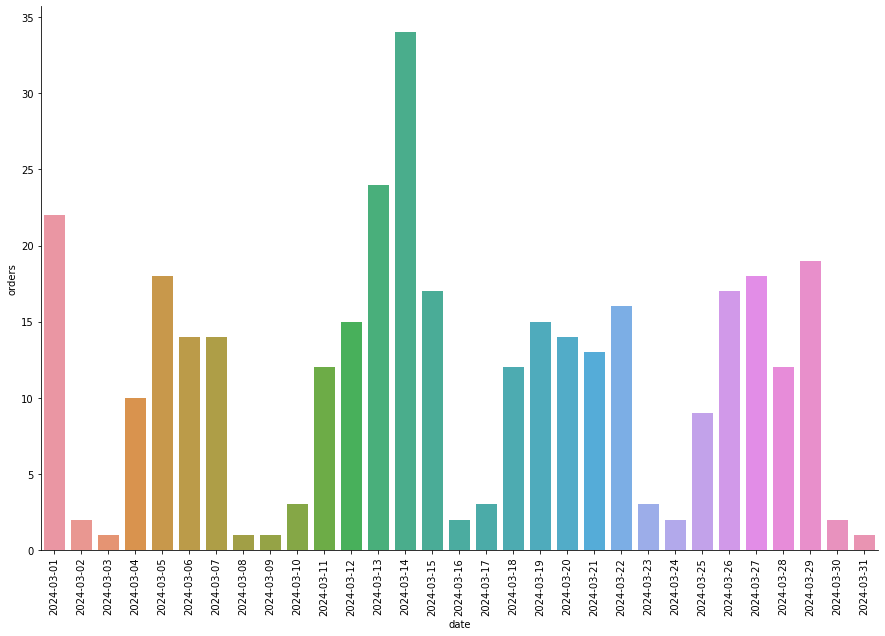

In [13]:
plt.figure(figsize=(15, 10))
sns.barplot(x=orders_by_date.date, y=orders_by_date.orders, order=orders_by_date.sort_values('date').date)
plt.xticks(rotation=90)
sns.despine()

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

In [ ]:
# Это 2024-03-08, пятница - праздничный день

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Проверьте каждый из четырех предложенных поинтов: есть ли дни, соответствующие одному или нескольким поинтам? Посмотрите на график или на значения в датафрейме с количеством заказов по дням.
      
</p>
</details>

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Объедините датафреймы `df_orders` и `df_order_status` в новый `orders_status`.
      
2) Можете вывести первые строчки нового датафрейма и посмотреть его размер, чтобы убедиться, что объединение прошло корректно.
      
3) Сохраните датафрейм в csv файл с помощью метода, задав его название как строку `orders_status.csv` и параметр `index=False`.
      
4) Скачайте получившийся csv файл из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код. 
      
</p>
</details>

In [14]:
# Ваш код здесь
orders_status = df_orders.merge(df_order_status, how='left', on='order_id')
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [ ]:
orders_status.to_csv('orders_status.csv', index=False)

## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Чтобы оставить в данных только информацию о том, был заказ подтвержден или отменен, выберите из датафрейма `orders_status` колонки с номером заказа и статусом, а затем удалите дубликаты (НЕ сохраняйте результат в тот же датафрейм, потому что `orders_status` в полном виде понадобится для решения следующих заданий).

2) Посчитайте частоту, с которой встречается каждый из статусов в оставшихся данных.

3) Посчитайте долю каждого из статусов. Значения округлите до 2 знаков после точки.

      
</p>
</details>

In [15]:
# Ваш код здесь
orders_status.groupby(['order_id', 'status'], as_index=False)\
    .agg({'date': 'count'})\
    .status.value_counts(normalize=True)

confirmed    0.893064
canceled     0.106936
Name: status, dtype: float64

In [16]:
orders_status.groupby(['order_id', 'status'], as_index=False)\
    .agg({'date': 'count'})\
    .status.value_counts(normalize=True).values

array([0.89306358, 0.10693642])

In [17]:
cancel_rate = orders_status.groupby(['order_id', 'status'], as_index=False)\
    .agg({'date': 'count'})\
    .status.value_counts(normalize=True).values[1]

In [18]:
round(cancel_rate, 2)

0.11

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Данные в датафрейме `orders_status` сгруппируйте по дате и статусу, посчитайте количество уникальных заказов для каждой группы. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Разверните получившийся датафрейм так, чтобы получилась сводная таблица, где в индексе — даты, в колонках — статусы, а в значениях — количество заказов. 
      
3) Пропуски заполните нулями.
      
4) Из-за того, что после разворота таблицы в колонках `canceled` и `confirmed` появились пропущенные значения, тип данных в этих колонках стал `float`. Но число заказов не может быть дробным, поэтому приведите эти колонки к типу `int`.
      
5) Отфильтруйте строки, где значение в колонке `confirmed` равно нулю.
      
</p>
</details>

In [19]:
# Ваш код здесь
orders_by_date_status = orders_status.groupby(['date', 'order_id', 'status'], as_index=False)\
    .agg({'manager': 'count'})\
    .rename(columns={'manager': 'orders'})
orders_by_date_status_pivoted = orders_by_date_status.pivot_table(index='date', columns='status', values='order_id', aggfunc='count').fillna(0)
orders_by_date_status_pivoted = orders_by_date_status_pivoted.reset_index()
orders_by_date_status_pivoted

status,date,canceled,confirmed
0,2024-03-01,2.0,20.0
1,2024-03-02,0.0,2.0
2,2024-03-03,0.0,1.0
3,2024-03-04,0.0,10.0
4,2024-03-05,0.0,18.0
5,2024-03-06,1.0,13.0
6,2024-03-07,1.0,13.0
7,2024-03-08,0.0,1.0
8,2024-03-09,1.0,0.0
9,2024-03-10,1.0,2.0


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Постройте линейный график, где по оси `х` будут идти даты, по оси `у` — количество заказов, а цвета линий будут определены статусами заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.

</p>
</details>

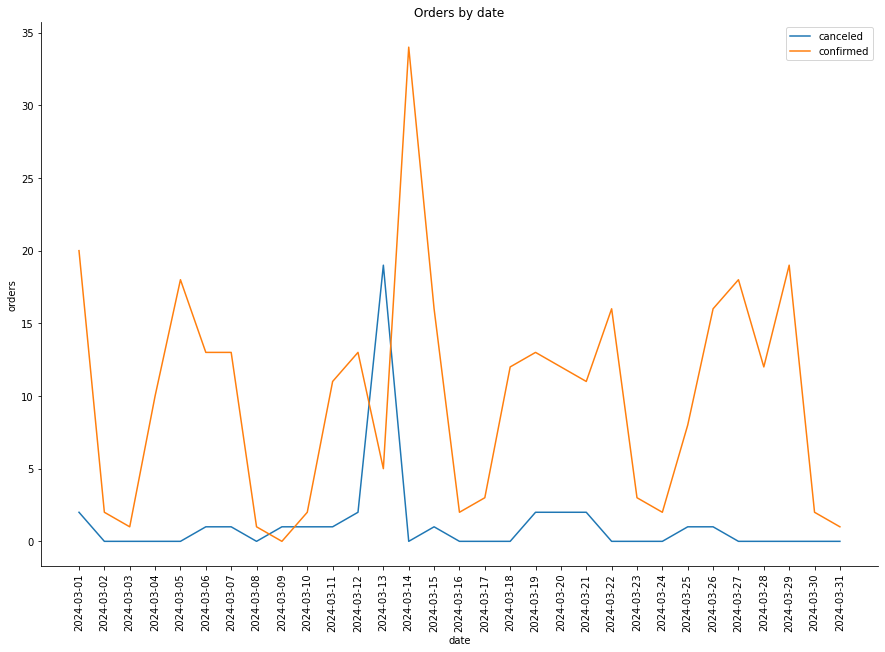

In [20]:
# Ваш код здесь
plt.figure(figsize=(15, 10))
plt.plot(orders_by_date_status_pivoted.date, orders_by_date_status_pivoted.canceled)
plt.plot(orders_by_date_status_pivoted.date, orders_by_date_status_pivoted.confirmed)
plt.legend(['canceled', 'confirmed'])
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('orders')
plt.title('Orders by date')
sns.despine()

## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите все отмененные заказы 13 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
2) Отберите все подтвержденные заказы 14 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
3) Объедините эти датафреймы с заказами по совпадающим характеристикам: имя менеджера, id клиента, число уникальных товаров в заказе и общее число товаров в штуках. Так у вас получатся те заказы, которые отменили в первый день и оформили заново на следующий.
      
4) Посчитайте число строк в датафрейме с заказами, которые отменили в первый день и оформили заново на следующий. Разделите это число на число строк в датафрейме с подтвержденными заказами 14 марта. Так вы узнаете долю заказов, которые повторяют вчерашние.
      
</p>
</details>

In [21]:
# Ваш код здесь
thirteen_march = orders_status.loc[(orders_status.date == '2024-03-13') & (orders_status.status == 'canceled')]
thirteen_march = thirteen_march.groupby('order_id', as_index=False)\
    .agg({'quantity': 'sum', 'product_id': 'nunique', 'manager': 'max', 'client_id': 'max'})\
    .rename(columns={'product_id': 'unique_products'})
thirteen_march

,order_id,quantity,unique_products,manager,client_id
0,AFIH-00611801,192,11,Алексей Саксофонов,43
1,BBFJ-27674101,294,14,Ксения Балалайкина,73
2,CLBQ-63032648,205,13,Виктор Тромбонов,60
3,CYJY-07359557,316,13,Екатерина Тарелкина,56
4,GHGB-88045656,42,4,Ксения Балалайкина,7
5,JEIF-69283221,207,15,Виктор Тромбонов,94
6,JQQO-28609300,252,15,Виктор Тромбонов,93
7,KJJS-03491897,399,18,Алексей Саксофонов,66
8,MIGZ-68487439,325,17,Алексей Саксофонов,51
9,NBIO-35476164,319,14,Виктор Тромбонов,95


In [22]:
fourteen_march = orders_status.loc[(orders_status.date == '2024-03-14') & (orders_status.status == 'confirmed')]
fourteen_march = fourteen_march.groupby('order_id', as_index=False)\
    .agg({'quantity': 'sum', 'product_id': 'nunique', 'manager': 'max', 'client_id': 'max'})\
    .rename(columns={'product_id': 'unique_products'})
fourteen_march

,order_id,quantity,unique_products,manager,client_id
0,ACXS-56511429,177,8,Алексей Саксофонов,24
1,AUZX-12706022,369,19,Екатерина Тарелкина,83
2,BCMM-97072924,325,17,Алексей Саксофонов,51
3,BGHE-44722549,149,8,Виктор Тромбонов,95
4,DMEB-71700015,190,12,Сергей Контрабасов,93
5,DOJS-07233317,277,16,Маргарита Камертонова,56
6,EJHJ-34261015,319,20,Максим Барабанов,87
7,EPBF-14743479,207,15,Виктор Тромбонов,94
8,EZAA-08394172,176,9,Анастасия Дудкина,39
9,FDEB-71487438,192,11,Алексей Саксофонов,43


In [23]:
thirteen_fourteen_merged = thirteen_march.merge(fourteen_march, how='inner', on=['client_id', 'manager', 'unique_products', 'quantity'])
thirteen_fourteen_merged

,order_id_x,quantity,unique_products,manager,client_id,order_id_y
0,AFIH-00611801,192,11,Алексей Саксофонов,43,FDEB-71487438
1,BBFJ-27674101,294,14,Ксения Балалайкина,73,UETB-44283966
2,CLBQ-63032648,205,13,Виктор Тромбонов,60,IECD-18739530
3,CYJY-07359557,316,13,Екатерина Тарелкина,56,WNMY-98871151
4,GHGB-88045656,42,4,Ксения Балалайкина,7,JUGG-73806170
5,JEIF-69283221,207,15,Виктор Тромбонов,94,EPBF-14743479
6,JQQO-28609300,252,15,Виктор Тромбонов,93,OWZC-14247946
7,KJJS-03491897,399,18,Алексей Саксофонов,66,GRCH-73394464
8,MIGZ-68487439,325,17,Алексей Саксофонов,51,BCMM-97072924
9,NBIO-35476164,319,14,Виктор Тромбонов,95,NFML-87752700


In [24]:
thirteen_fourteen_merged.shape[0] / fourteen_march.shape[0]

0.47058823529411764

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Откройте файл `usd_rate.txt` с помощью контекстного менеджера `with` и функции `open()`. Список строк сохраните в переменную `currency`.
      
2) С помощью функции `pd.DataFrame(columns=['col_name'])` создайте из списка датафрейм с любым названием единственной колонки.
      
3) На основе имеющейся колонки создайте колонки `date` и `currency_rate`, куда положите соответствующие данные. Для этого разделите общую строку со всеми данными и возьмите нужные данные по индексу.
      
4) Переведите колонку `date` в тип `datetime`.
      
5) Удалите из датафрейма ненужную колонку с общими данными.
      
6) Посчитайте среднее значение курса доллара за месяц.
      
7) Результат округлите до двух знаков после точки.   
      
</p>
</details>

In [25]:
# Ваш код здесь
usd_rate = open('usd_rate.txt')
usd_data = []
for line in usd_rate.readlines():
    usd_data.append([value.strip() for value in line.split(',')])

In [26]:
col_names = ['date', 'currency_rate', 'currency']

In [27]:
usd_df = pd.DataFrame(usd_data, columns = col_names)

In [28]:
usd_df = usd_df.drop(columns='currency')

In [29]:
usd_df

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534
5,2024-03-06,91.1604
6,2024-03-07,90.3412
7,2024-03-08,90.7493
8,2024-03-09,90.7493
9,2024-03-10,90.7493


In [30]:
usd_df.dtypes

date             object
currency_rate    object
dtype: object

In [31]:
usd_df['currency_rate'] = usd_df['currency_rate'].astype('float')

In [32]:
usd_df.dtypes

date              object
currency_rate    float64
dtype: object

In [33]:
round(usd_df['currency_rate'].mean(), 2)

91.7

In [34]:
usd_rate.close()

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Присоедините к датафрейму `orders_status` датафрейм `df_products`, указав, что ключом в левом датафрейме будет являться колонка `product_id` (параметр `left_on`), а в правом — колонка `id` (параметр `right_on`). Новый датафрейм сохраните в `df_full`.
      
2) К датафрейму `df_full` добавьте информацию о курсе доллара на каждую дату, присоединив датафрейм `df_currency` по общей колонке с датой.
      
3) Создайте колонку `price_rub` с ценами в рублях. Для этого умножьте значения в колонке `price` с ценами на значения в колонке `currency_rate` с курсом валюты.
      
4) Создайте колонку `revenue` с выручкой, умножив колонку со стоимостью единицы товара в рублях на колонку с количеством товара.
      
5) Отберите только записи с подтвержденными заказами и сохраните результат в датафрейм `df_confirmed`, он вам ещё пригодится.
      
6) Суммируйте значения в колонке `revenue` и округлите результат до двух знаков после точки.
      
</p>
</details>

In [35]:
# Ваш код здесь
orders_status.head()


,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed


In [36]:
df_products.head()

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер


In [37]:
usd_df.head()

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534


In [38]:
df_order_status_products = orders_status.merge(df_products, how='left', left_on='product_id', right_on='id')
df_order_status_products

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон
...,...,...,...,...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed,812,"Klipsch, Cinema 400",246.34,Саундбар
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed,145,"Dali, Oberon 7 C",1640.45,Напольная акустика
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed,194,"Dali, Oberon Vokal",462.20,Центральный канал
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed,1086,"Pioneer, Elite VSX-LX503",879.52,AV-ресивер


In [39]:
df_full = df_order_status_products.merge(usd_df, how='left', on='date')
df_full

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493
...,...,...,...,...,...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed,812,"Klipsch, Cinema 400",246.34,Саундбар,92.7761
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed,145,"Dali, Oberon 7 C",1640.45,Напольная акустика,92.7761
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed,194,"Dali, Oberon Vokal",462.20,Центральный канал,92.7761
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed,1086,"Pioneer, Elite VSX-LX503",879.52,AV-ресивер,92.7761


In [40]:
df_full = df_full.drop(columns='id')
df_full['revenue_rub'] = df_full.price * df_full.quantity * df_full.currency_rate
df_full

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,revenue_rub
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed,"Klipsch, Cinema 400",246.34,Саундбар,92.7761,5.485071e+05
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed,"Dali, Oberon 7 C",1640.45,Напольная акустика,92.7761,1.369751e+06
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed,"Dali, Oberon Vokal",462.20,Центральный канал,92.7761,2.572867e+05
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed,"Pioneer, Elite VSX-LX503",879.52,AV-ресивер,92.7761,2.447953e+05


In [41]:
revenue = df_full[df_full['status'] == 'confirmed'].revenue_rub.sum()
round(revenue, 2)

2038231821.56

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Посчитайте число уникальных подтвержденных заказов.

2) Разделите сумму выручки, посчитанную на прошлом шаге (без округления), на это число.

3) Результат округлите до двух знаков после точки.  
      
</p>
</details>

In [42]:
# Ваш код здесь
no_of_orders = df_full[df_full['status'] == 'confirmed'].order_id.nunique()
print(no_of_orders)
average_order_price = revenue / no_of_orders
round(average_order_price, 2)

309


6596219.49

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сгруппируйте датафрейм `df_confirmed` с подтвержденными заказами по дате и посчитайте на каждую дату число ункальных заказов и выручку. Результат сохраните в датафрейм `df_report_by_date`. Получившуюся колонку с числом заказов можете переименовать в `orders`. 
      
2) Создайте колонку со значением среднего чека в каждую дату, для этого разделите значения в колонке с выручкой на значения в колонке с числом заказов. Результат округлите до двух знаков после точки
      
3) Постройте три линейных графика, один под другим (в одной ячейке или в разных)
      
</p>
</details>

In [43]:
# Ваш код здесь
df_full_by_date_metrics = df_full[df_full['status'] == 'confirmed'].groupby('date', as_index=False)\
    .agg({'revenue_rub': 'sum', 'order_id': 'nunique'})\
    .rename(columns={'order_id': 'no_of_orders'})
df_full_by_date_metrics

,date,revenue_rub,no_of_orders
0,2024-03-01,1.554118e+08,20
1,2024-03-02,1.197167e+07,2
2,2024-03-03,2.548418e+06,1
3,2024-03-04,6.404993e+07,10
4,2024-03-05,8.952724e+07,18
5,2024-03-06,1.107687e+08,13
6,2024-03-07,9.102331e+07,13
7,2024-03-08,1.609147e+06,1
8,2024-03-10,8.929309e+06,2
9,2024-03-11,8.910847e+07,11


In [44]:
df_full_by_date_metrics['avg_order_price'] = df_full_by_date_metrics.revenue_rub / df_full_by_date_metrics.no_of_orders
df_full_by_date_metrics

,date,revenue_rub,no_of_orders,avg_order_price
0,2024-03-01,1.554118e+08,20,7.770588e+06
1,2024-03-02,1.197167e+07,2,5.985834e+06
2,2024-03-03,2.548418e+06,1,2.548418e+06
3,2024-03-04,6.404993e+07,10,6.404993e+06
4,2024-03-05,8.952724e+07,18,4.973735e+06
5,2024-03-06,1.107687e+08,13,8.520669e+06
6,2024-03-07,9.102331e+07,13,7.001793e+06
7,2024-03-08,1.609147e+06,1,1.609147e+06
8,2024-03-10,8.929309e+06,2,4.464655e+06
9,2024-03-11,8.910847e+07,11,8.100770e+06


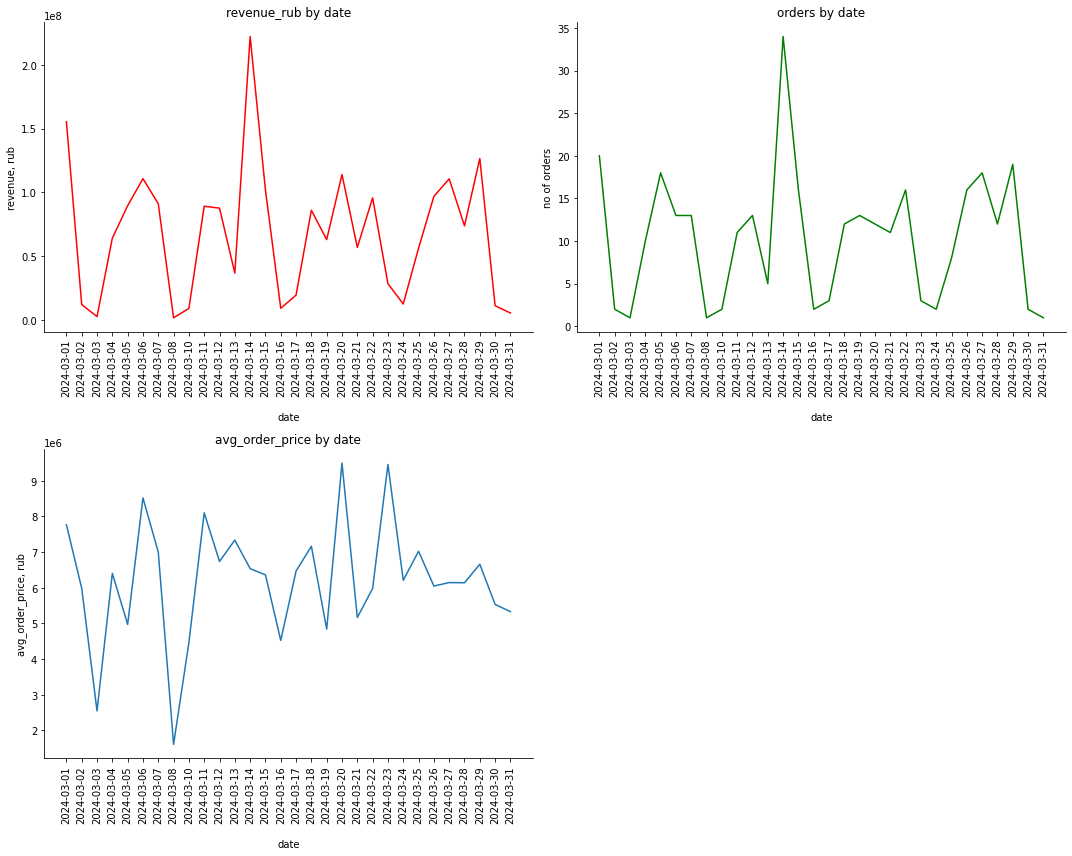

In [45]:
plt.figure(figsize=(15,12))

plt.subplot(221)
plt.plot(df_full_by_date_metrics.date, df_full_by_date_metrics.revenue_rub, 'r')
plt.xlabel('\ndate')
plt.ylabel('revenue, rub')
plt.xticks(rotation=90)
plt.title('revenue_rub by date')

plt.subplot(222)
plt.plot(df_full_by_date_metrics.date, df_full_by_date_metrics.no_of_orders, 'g')
plt.xlabel('\ndate')
plt.ylabel('no of orders')
plt.xticks(rotation=90)
plt.title('orders by date')

plt.subplot(223)
plt.plot(df_full_by_date_metrics.date, df_full_by_date_metrics.avg_order_price)
plt.xlabel('\ndate')
plt.ylabel('avg_order_price, rub')
plt.xticks(rotation=90)
plt.title('avg_order_price by date')

plt.tight_layout()
sns.despine()

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) В датафрейме `df_full` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке name и возьмите первое из них (сначала идет бренд и через запятую модель товара).

2) Посчитайте количество уникальных значений в колонке `brand`.
      
</p>
</details>

In [46]:
# Ваш код здесь
df_full = df_full.assign(brand = df_full.name.apply(lambda x: x.split(',')[0]))
df_full.brand.nunique()

121

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите в датафрейме `df_full` только подтвержденные заказы.

2) Сгруппируйте данные по брендам и посчитайте выручку и количество уникальных заказов.

3) Отсортируйте агрегированные данные по убыванию выручки и посмотрите бренд в верхней строчке.

4) Дополнительно: отсортируйте агрегированные данные по убыванию количество заказов и посмотрите бренд в верхней строчке.

</p>
</details>

In [47]:
# Ваш код здесь
df_full.head()


,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,revenue_rub,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,2.902290e+05,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,1.643561e+05,JBL
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,1.176358e+06,KEF
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,6.725068e+04,Heco
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,8.705580e+04,Rode


In [48]:
df_full.groupby('brand', as_index=False)\
    .agg({'revenue_rub': 'sum'})\
    .sort_values('revenue_rub', ascending=False)

,brand,revenue_rub
46,JBL,3.080112e+08
43,Heco,2.632046e+08
53,Klipsch,2.205107e+08
120,Yamaha,1.798673e+08
49,KEF,1.619835e+08
...,...,...
88,SMSL,3.841799e+04
8,AudioSource,3.388167e+04
40,Fosi Audio,3.129419e+04
18,Bravo Audio,2.405086e+04


In [49]:
df_full[df_full['status'] == 'confirmed'].groupby('brand', as_index=False)\
    .agg({'revenue_rub': 'sum'})\
    .sort_values('revenue_rub', ascending=False)

,brand,revenue_rub
46,JBL,2.665961e+08
43,Heco,2.388163e+08
53,Klipsch,2.039024e+08
120,Yamaha,1.658651e+08
49,KEF,1.465101e+08
...,...,...
8,AudioSource,3.388167e+04
40,Fosi Audio,3.129419e+04
1,ART,2.670040e+04
18,Bravo Audio,2.405086e+04


In [50]:
df_full[df_full['status'] == 'confirmed'].groupby(['order_id','brand'], as_index=False)\
    .agg({'date': 'count'})\
    .rename(columns={'date': 'brand_count'})\
    .sort_values(['order_id', 'brand_count'], ascending=[True, False])

,order_id,brand,brand_count
2,ABID-18767701,JBL,5
4,ABID-18767701,Klipsch,2
0,ABID-18767701,Beyerdynamic,1
1,ABID-18767701,Heco,1
3,ABID-18767701,KEF,1
...,...,...,...
2936,ZVTW-19610380,Magnat,1
2938,ZVTW-19610380,SMSL,1
2939,ZVTW-19610380,TONOR,1
2940,ZVTW-19610380,Wharfedale,1


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сохраните в список `products_in_orders` уникальные идентификаторы товаров из датафрейма `df_confirmed`.
      
2) Создайте в датафрейме `df_products` новую колонку `is_in_orders`, в которой будет значение `yes`, если значение из колонки `id` этого датафрейма есть в списке `products_in_orders`. Если его в этом списке нет - в новую колонку для этой строчки запишите значение `no`.
      
3) Посчитайте количество встречающихся значений `yes` и  `no` в колонке `is_in_orders`.
      
</p>
</details>

In [51]:
# Ваш код здесь
df_comfirmed = df_full[df_full.status == 'confirmed']
confirmed_product_ids = df_comfirmed.product_id.unique()
confirmed_product_ids

array([ 489,  594,  670, ..., 1568, 1333,  194])

In [52]:
df_products['is_in_orders'] = df_products.id.apply(lambda x: 'yes' if x in confirmed_product_ids else 'no')

In [53]:
df_products

,id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes
...,...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники,yes
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники,yes
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники,yes
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники,yes


In [54]:
df_products.groupby('is_in_orders', as_index=False)\
    .agg({'id': 'count'})

,is_in_orders,id
0,no,497
1,yes,1180


## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) В датафрейме `df_products` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке `name` и возьмите первое из них (сначала идет бренд и через запятую модель товара).
      
2) Сгруппируйте данные по бренду и колонке, в которой указано, есть товар в заказах, и посчитайте число уникальных товаров. Колонку с числом товаров можете переименовать в `products`.
      
3) Разверните сгруппированные данные так, чтобы получилась сводная таблица в которой в индексе названия брендов, в колонках - есть товар в заказах или нет (`yes` и `no`), в значениях - количество товаров.
      
4) Заполните пропуски нулями.
      
5) Сбросьте индекс, чтобы названия брендов стали колонкой.
      
6) Посчитайте общее число товаров для каждого бренда, сложив значения в колонках `yes` и `no`.
      
7) Для каждого бренда посчитайте долю ни разу не заказанных товаров от всех продаваемых товаров этого бренда.
      
8) Отберите только те бренды, где общее число товаров больше 15 и доля ни разу не заказанных товаров больше половины (0.5).
      
</p>
</details>

In [55]:
# Ваш код здесь
df_products = df_products.assign(brand = df_products.name.apply(lambda x: x.split(',')[0]))
df_products_by_brand = df_products.groupby('brand', as_index=False)\
    .agg({'id': 'count'})
df_products_by_brand = df_products_by_brand.loc[df_products_by_brand.id >= 15]
df_products_by_brand

,brand,id
5,Anker,15
17,Bose,21
32,Dali,67
36,Denon,41
39,Edifier,73
53,Harman Kardon,80
54,Heco,91
57,JBL,115
60,KEF,82
64,Klipsch,72


In [56]:
df_products_wide_brands = df_products.merge(df_products_by_brand, how='inner', on='brand')
df_products_wide_brands

,id_x,name,price,category,is_in_orders,brand,id_y
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes,Denon,41
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes,Denon,41
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes,Denon,41
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes,Denon,41
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes,Denon,41
...,...,...,...,...,...,...,...
1282,28,"Anker, Soundcore Liberty 2 Pro",126.79,Беспроводные наушники,no,Anker,15
1283,29,"Anker, Soundcore Liberty Air",72.11,Беспроводные наушники,yes,Anker,15
1284,30,"Anker, Soundcore Liberty Air 2",86.96,Беспроводные наушники,yes,Anker,15
1285,31,"Anker, Soundcore Life Dot 2",42.70,Беспроводные наушники,no,Anker,15


In [57]:
df_products_wide_brands_pivoted = df_products_wide_brands.groupby(['brand', 'is_in_orders'], as_index=False)\
    .agg({'price': 'count'})\
    .rename(columns={'price': 'quantity'})\
    .pivot(index='brand', columns='is_in_orders', values='quantity')
df_products_wide_brands_pivoted['not_in_order_rate'] = df_products_wide_brands_pivoted.no / (df_products_wide_brands_pivoted.no + df_products_wide_brands_pivoted.yes)

In [58]:
df_products_wide_brands_pivoted

is_in_orders,no,yes,not_in_order_rate
brand,,,
Anker,4,11,0.266667
Bose,6,15,0.285714
Dali,49,18,0.731343
Denon,7,34,0.170732
Edifier,20,53,0.273973
Harman Kardon,19,61,0.237500
Heco,6,85,0.065934
JBL,7,108,0.060870
KEF,54,28,0.658537


In [59]:
df_products_wide_brands_pivoted[df_products_wide_brands_pivoted.not_in_order_rate > 0.5]

is_in_orders,no,yes,not_in_order_rate
brand,,,
Dali,49,18,0.731343
KEF,54,28,0.658537
Marantz,19,3,0.863636
Pioneer,70,33,0.679612


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) Сгруппируйте данные с подтвержденными заказами из датафрейма `df_confirmed` по менеджерам и посчитайте для каждого сумму выручки и количество заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Отсортируйте записи по убыванию выручки.
      
3) Посчитайте процент выручки, приходящейся на каждого менеджера: разделите его выручку на суммарную выручку всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.
      
4) Посчитайте процент заказов, приходящихся на каждого менеджера: разделите его число заказов на суммарное число заказов всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.   
      
5) Постройте два барплота (столбиковые диаграммы): со значениями % выручки и % заказов у каждого менеджера.
      
</p>
</details>

In [60]:
df_full

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,revenue_rub,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,2.902290e+05,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,1.643561e+05,JBL
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,1.176358e+06,KEF
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,6.725068e+04,Heco
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,8.705580e+04,Rode
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed,"Klipsch, Cinema 400",246.34,Саундбар,92.7761,5.485071e+05,Klipsch
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed,"Dali, Oberon 7 C",1640.45,Напольная акустика,92.7761,1.369751e+06,Dali
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed,"Dali, Oberon Vokal",462.20,Центральный канал,92.7761,2.572867e+05,Dali
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed,"Pioneer, Elite VSX-LX503",879.52,AV-ресивер,92.7761,2.447953e+05,Pioneer


In [61]:
# Ваш код здесь
df_full_by_manager = df_full[df_full.status == 'confirmed'].groupby('manager', as_index=False)\
    .agg({'revenue_rub': 'sum', 'order_id': 'nunique'})\
    .rename(columns={'order_id': 'orders'})
df_full_by_manager

,manager,revenue_rub,orders
0,Алексей Саксофонов,1.953435e+08,27
1,Анастасия Дудкина,1.234504e+08,20
2,Антон Скрипкин,5.150268e+07,7
3,Аркадий Октавин,2.973678e+07,5
4,Виктор Тромбонов,3.188999e+08,50
5,Владимир Ударников,2.084865e+08,31
6,Екатерина Тарелкина,1.781576e+08,28
7,Ксения Балалайкина,1.817621e+08,27
8,Максим Барабанов,2.401478e+08,40
9,Маргарита Камертонова,3.473886e+08,48


In [62]:
df_full_by_manager['revenue_rate'] = df_full_by_manager.revenue_rub / revenue * 100
df_full_by_manager['orders_rate'] = df_full_by_manager.orders / no_of_orders * 100
df_full_by_manager.sort_values('revenue_rate', ascending=False)

,manager,revenue_rub,orders,revenue_rate,orders_rate
9,Маргарита Камертонова,3.473886e+08,48,17.043625,15.533981
4,Виктор Тромбонов,3.188999e+08,50,15.645910,16.181230
8,Максим Барабанов,2.401478e+08,40,11.782164,12.944984
5,Владимир Ударников,2.084865e+08,31,10.228792,10.032362
0,Алексей Саксофонов,1.953435e+08,27,9.583970,8.737864
7,Ксения Балалайкина,1.817621e+08,27,8.917638,8.737864
6,Екатерина Тарелкина,1.781576e+08,28,8.740794,9.061489
10,Надежда Гармошкина,1.347836e+08,21,6.612773,6.796117
1,Анастасия Дудкина,1.234504e+08,20,6.056738,6.472492
2,Антон Скрипкин,5.150268e+07,7,2.526832,2.265372


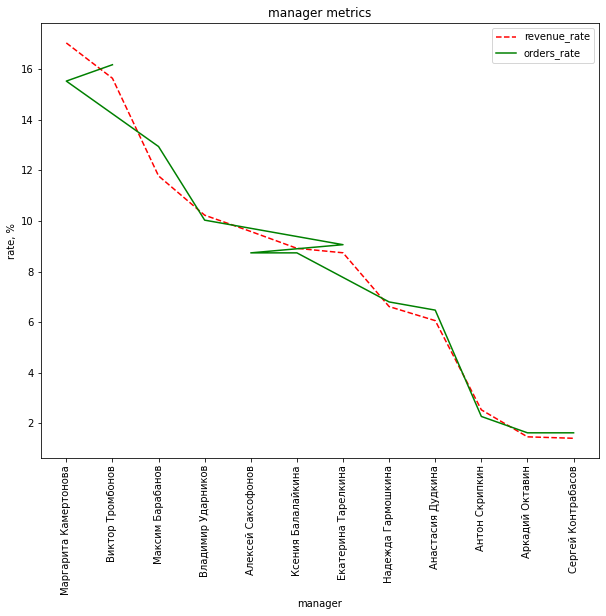

In [63]:
plt.figure(figsize=(10,8))

plt.plot(df_full_by_manager.sort_values('revenue_rate', ascending=False).manager, df_full_by_manager.sort_values('revenue_rate', ascending=False).revenue_rate, '--r',
         df_full_by_manager.sort_values('orders_rate', ascending=False).manager, df_full_by_manager.sort_values('orders_rate', ascending=False).orders_rate, 'g')
plt.title('manager metrics')
plt.xticks(rotation=90)
plt.xlabel('manager')
plt.ylabel('rate, %')
plt.legend(['revenue_rate', 'orders_rate'])

In [ ]:
# Additional tasks

In [ ]:
# Task 1: Посмотрите, в какие дни недели оформляется в среднем больше заказов

In [64]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,revenue_rub,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,2.902290e+05,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,1.643561e+05,JBL
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,1.176358e+06,KEF
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,6.725068e+04,Heco
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,8.705580e+04,Rode


In [68]:
df_full['date'] = pd.to_datetime(df_full['date'])

In [81]:
df_full['weekday'] = df_full['date'].dt.day_name()

In [92]:
df_full_by_weekday = df_full.groupby(['weekday'], as_index=False)\
    .agg({'order_id': 'nunique'})\
    .rename(columns={'order_id': 'orders'})
df_full_by_weekday

,weekday,orders
0,Friday,75
1,Monday,43
2,Saturday,10
3,Sunday,10
4,Thursday,73
5,Tuesday,65
6,Wednesday,70


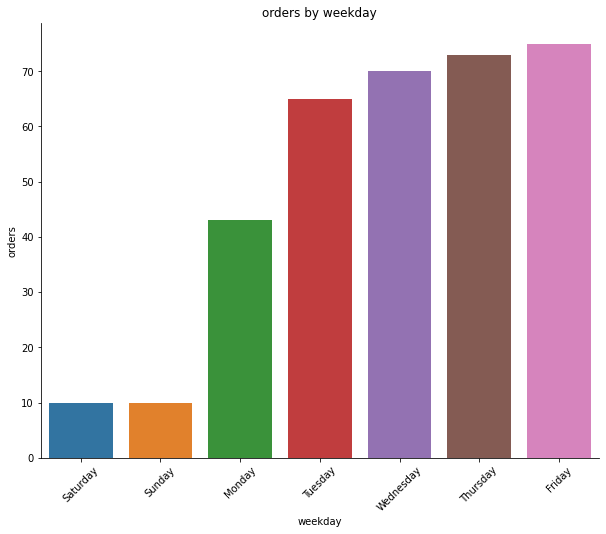

In [93]:
plt.figure(figsize=(10, 8))
sns.barplot(data = df_full_by_weekday, x='weekday', y='orders', order=df_full_by_weekday.sort_values('orders').weekday)
plt.title('orders by weekday')
plt.xticks(rotation=45)
plt.xlabel('weekday')
plt.ylabel('orders')
sns.despine()

In [ ]:
# Task 2: составьте более полный отчет по продажам каждого менеджера (учтите отмененные заказы)

In [101]:
df_full_by_manager_full_analysis = df_full.groupby(['manager', 'status'], as_index=False)\
    .agg({'order_id': 'nunique'})\
    .rename(columns={'order_id': 'orders'})\
    .pivot(index='manager', columns='status', values=['orders']).fillna(0)
df_full_by_manager_full_analysis

orders          
status                canceled confirmed
manager                                 
Алексей Саксофонов         3.0      27.0
Анастасия Дудкина          1.0      20.0
Антон Скрипкин             1.0       7.0
Аркадий Октавин            0.0       5.0
Виктор Тромбонов           5.0      50.0
Владимир Ударников         5.0      31.0
Екатерина Тарелкина        4.0      28.0
Ксения Балалайкина         5.0      27.0
Максим Барабанов           3.0      40.0
Маргарита Камертонова      7.0      48.0
Надежда Гармошкина         3.0      21.0
Сергей Контрабасов         0.0       5.0

In [120]:
df_full_by_manager_full_analysis['cancel_rate'] = df_full_by_manager_full_analysis.orders.canceled / (df_full_by_manager_full_analysis.orders.canceled + df_full_by_manager_full_analysis.orders.confirmed) * 100
df_full_by_manager_full_analysis = df_full_by_manager_full_analysis.reset_index()
df_full_by_manager_full_analysis

manager   orders           cancel_rate
status                        canceled confirmed            
0          Алексей Саксофонов      3.0      27.0   10.000000
1           Анастасия Дудкина      1.0      20.0    4.761905
2              Антон Скрипкин      1.0       7.0   12.500000
3             Аркадий Октавин      0.0       5.0    0.000000
4            Виктор Тромбонов      5.0      50.0    9.090909
5          Владимир Ударников      5.0      31.0   13.888889
6         Екатерина Тарелкина      4.0      28.0   12.500000
7          Ксения Балалайкина      5.0      27.0   15.625000
8            Максим Барабанов      3.0      40.0    6.976744
9       Маргарита Камертонова      7.0      48.0   12.727273
10         Надежда Гармошкина      3.0      21.0   12.500000
11         Сергей Контрабасов      0.0       5.0    0.000000

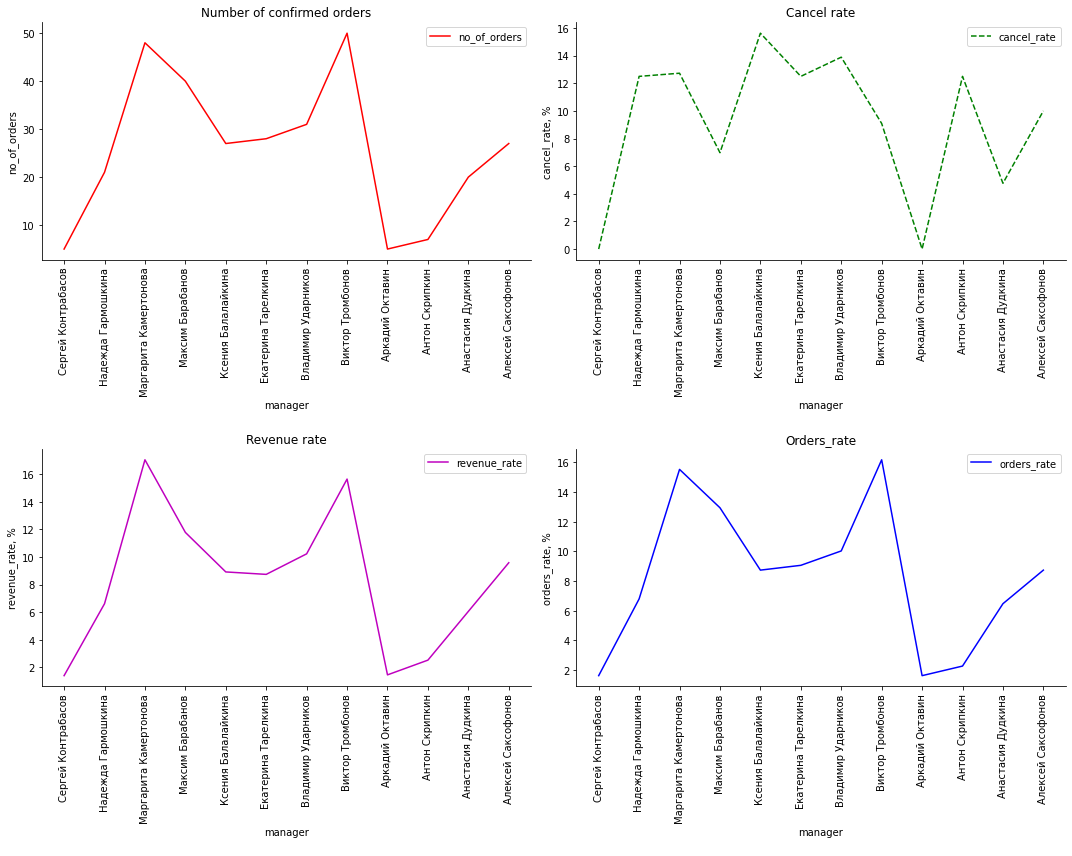

In [126]:
plt.figure(figsize=(15, 12))
plt.subplot(221)
plt.plot(df_full_by_manager_full_analysis.sort_values('manager', ascending=False).manager, df_full_by_manager_full_analysis.sort_values('manager', ascending=False).orders.confirmed, 'r')
plt.xticks(rotation=90)
plt.title('Number of confirmed orders')
plt.xlabel('manager\n')
plt.ylabel('no_of_orders')
plt.legend(['no_of_orders'])

plt.subplot(222)
plt.plot(df_full_by_manager_full_analysis.sort_values('manager', ascending=False).manager, df_full_by_manager_full_analysis.sort_values('manager', ascending=False).cancel_rate, 'g--')
plt.xticks(rotation=90)
plt.title('Cancel rate')
plt.xlabel('manager\n')
plt.ylabel('cancel_rate, %')
plt.legend(['cancel_rate'])

plt.subplot(223)
plt.plot(df_full_by_manager.sort_values('manager', ascending=False).manager, df_full_by_manager.sort_values('manager', ascending=False).revenue_rate, 'm')
plt.xticks(rotation=90)
plt.title('Revenue rate')
plt.xlabel('manager\n')
plt.ylabel('revenue_rate, %')
plt.legend(['revenue_rate'])

plt.subplot(224)
plt.plot(df_full_by_manager.sort_values('manager', ascending=False).manager, df_full_by_manager.sort_values('manager', ascending=False).orders_rate, 'b')
plt.xticks(rotation=90)
plt.title('Orders_rate')
plt.xlabel('manager\n')
plt.ylabel('orders_rate, %')
plt.legend(['orders_rate'])

plt.tight_layout()
sns.despine()

In [ ]:
# Task 3: определите наиболее и наименее популярные/прибыльные категории товаров

In [127]:
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,revenue_rub,brand,weekday
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,2.902290e+05,Heco,Sunday
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,1.643561e+05,JBL,Sunday
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,1.176358e+06,KEF,Sunday
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,6.725068e+04,Heco,Sunday
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,8.705580e+04,Rode,Sunday


In [133]:
df_full_by_category = df_full[df_full.status == 'confirmed']\
    .groupby('category', as_index=False)\
    .agg({'product_id': 'count'})\
    .rename(columns={'product_id': 'category_ordered'})\
    .sort_values('category_ordered', ascending=False)
df_full_by_category

,category,category_ordered
4,Беспроводные наушники,401
16,Полочная акустика,370
20,Сабвуфер,312
13,Напольная акустика,302
14,Настенная акустика,258
2,Активные колонки,256
19,Проводные наушники,256
21,Саундбар,227
23,Умная колонка,202
15,Наушники с микрофоном,198


## Итоги

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке». Вы проделали отличную работу!

Но если считаете, что можете больше, продолжайте анализ имеющихся данных самостоятельно. Например, посмотрите, в какие дни недели оформляется в среднем больше заказов; составьте более полный отчет по продажам каждого менеджера (учтите отмененные заказы); определите наиболее и наименее популярные/прибыльные категории товаров и т.п. Данные полны инсайтов! Но эти задания не оцениваются и по ним не осуществляется поддержка экспертов. Зато вы можете сделать эту работу своим пет-проектом :)